# Convolutional Neural Network

Que1: What is CNN? How does it work behind the scenes?

Que2: What are Stride, Padding, Kernel Filters, and Pooling?

Que3: Why does Overfitting happen in CNN, and how can you avoid it?

Que4: Why is InceptionNet better than VGG?

Que5: What is Augmentation?

Que6: Can you explain the concept of feature maps in CNNs?

1 Ans- CNN, or Convolutional Neural Network, is a deep learning model used for processing visual data. It works by applying filters to input images to extract features like edges and shapes. These filters are learned automatically during training. CNNs also use techniques like pooling to reduce the spatial dimensions of features, making them more computationally efficient. The final layers of a CNN are typically fully connected, allowing the network to classify images into different categories. Overall, CNNs have been highly successful in tasks like image recognition, object detection, and more.

2 Ans- **Stride** determines how much the filter moves across the input image. A stride of 1 means the filter moves one pixel at a time, while a stride of 2 means it moves two pixels at a time.

**Padding** is used to preserve the spatial dimensions of the input volume. It involves adding extra pixels around the input image, so that the filter can be applied to the border pixels as well. Padding helps in retaining more information from the original image.

**Kernel Filters** are small matrices used to extract features from the input data.

**Pooling** is a  operation that reduces the  dimensions of the feature map. Common pooling techniques include max pooling , minpooling and average pooling.

3 Ans- Overfitting can occur in CNNs due to their high capacity to learn complex patterns, which can lead to the model memorizing the training data rather than generalizing well to unseen data.

methods to avoid overfitting are:

* Data Augmentation
* Dropout
* Early Stopping
* Regularization


4 ans-
* Compared to VGG, InceptionNet achieves similar or better performance with fewer parameters, making it more parameter-efficient.
* InceptionNet uses 1x1 convolutions for dimensionality reduction before larger convolutions of 3x3 and 5x5, reducing computational cost and overfitting.
*  InceptionNet can be easily scaled up or down by adjusting the number of filters and the depth of the network, making it adaptable to different computational requirements.

5 ans- Augmentation in the context of deep learning refers to the technique of artificially expanding the size of a dataset by creating modified versions of images or other data points through transformations like rotation, scaling, and flipping. Augmentation helps in improving the generalization and robustness of deep learning models by exposing them to a wider variety of training examples.

6 ans- Feature maps in Convolutional Neural Networks (CNNs) are the result of applying filters (kernels) to input data, such as images. Each filter detects specific features, like edges or textures, at different spatial positions in the input.

# Machine Learning Techniques

### Problem statement and Objective

#### Black Friday Project

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.






### Data Variable Definition
• User_ID User ID


• Product_ID Product ID


• Gender Sex of User


• Age Age in bins


• Occupation Occupation (Masked)


• City_Category Category of the City (A,B,C)


• Stay_In_Current_City_Years Number of years stay in current city


• Marital_Status Marital Status


• Product_Category_1 Product Category (Masked)


• Product_Category_2 Product may belongs to other category also (Masked)


• Product_Category_3 Product may belongs to other category also (Masked)


• Purchase Purchase Amount (Target Variable)



### Goal

Our goal is to predict the purchase amount of customers for various products after completing all the necessary preprocessing steps. Additionally, hyperparameter tuning and cross validation is essential. We also need to apply feature selection techniques such as SelectKBest, VIF, and PCA.

#Dataset Link


https://raw.githubusercontent.com/s4sauravv/Datasets/main/Black%20Friday.csv


You have to use multiple algorithms to build the model, and whichever algorithm performs the best, you have to do hyperparameter tuning for it. After tuning the hyperparameters, you also need to plot its best fit line.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/s4sauravv/Datasets/main/Black%20Friday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [7]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [8]:
mode_cat=round(df[~df['Product_Category_2'].isnull()]['Product_Category_2'].mode(),2)[0]
mode_cat

8.0

In [9]:
df['Product_Category_2']=df['Product_Category_2'].replace(np.nan,mode_cat)

In [10]:
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [11]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [12]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [13]:
mode_cat_3=round(df[~df['Product_Category_3'].isnull()]['Product_Category_3'].mode(),2)[0]
mode_cat_3

16.0

In [14]:
df['Product_Category_3']=df['Product_Category_3'].replace(np.nan,mode_cat)

In [15]:
df['Product_Category_3'].unique()

array([ 8., 14., 17.,  5.,  4., 16., 15.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [16]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [17]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,8.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,8.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,8.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,8.0,7969


In [18]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
age_mapping = {'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7}

In [20]:
df['Age'] = df['Age'].map(age_mapping)

In [21]:
df.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
368084,1002716,P00116142,F,6,4,C,3,1,10,13.0,16.0,14630
467258,1005974,P00010842,F,3,1,C,0,1,8,16.0,8.0,10007
249340,1002402,P00321742,M,5,17,B,4+,0,5,8.0,17.0,5452
532913,1004041,P00072842,M,2,3,B,2,0,5,8.0,8.0,5191
96552,1002962,P00025442,M,4,3,A,2,0,1,2.0,9.0,15167


In [22]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [23]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [24]:
df=pd.get_dummies(df,columns=['Gender','City_Category','Stay_In_Current_City_Years'],drop_first=True,sparse=False,dtype=np.int64)

In [25]:
df.head()

,User_ID,Product_ID,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,1,10,0,3,8.0,8.0,8370,0,0,0,0,1,0,0
1,1000001,P00248942,1,10,0,1,6.0,14.0,15200,0,0,0,0,1,0,0
2,1000001,P00087842,1,10,0,12,8.0,8.0,1422,0,0,0,0,1,0,0
3,1000001,P00085442,1,10,0,12,14.0,8.0,1057,0,0,0,0,1,0,0
4,1000002,P00285442,7,16,0,8,8.0,8.0,7969,1,0,1,0,0,0,1


In [26]:
df.drop(columns=['User_ID','Product_ID'],inplace=True)

In [27]:
df.head()

,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1,10,0,3,8.0,8.0,8370,0,0,0,0,1,0,0
1,1,10,0,1,6.0,14.0,15200,0,0,0,0,1,0,0
2,1,10,0,12,8.0,8.0,1422,0,0,0,0,1,0,0
3,1,10,0,12,14.0,8.0,1057,0,0,0,0,1,0,0
4,7,16,0,8,8.0,8.0,7969,1,0,1,0,0,0,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            550068 non-null  int64  
 1   Occupation                     550068 non-null  int64  
 2   Marital_Status                 550068 non-null  int64  
 3   Product_Category_1             550068 non-null  int64  
 4   Product_Category_2             550068 non-null  float64
 5   Product_Category_3             550068 non-null  float64
 6   Purchase                       550068 non-null  int64  
 7   Gender_M                       550068 non-null  int64  
 8   City_Category_B                550068 non-null  int64  
 9   City_Category_C                550068 non-null  int64  
 10  Stay_In_Current_City_Years_1   550068 non-null  int64  
 11  Stay_In_Current_City_Years_2   550068 non-null  int64  
 12  Stay_In_Current_City_Years_3  

# **VIF**

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# create a new DataFrame with only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'int32', 'float32', 'float64']).drop(['Purchase'], axis=1)

# calculate VIF for each column
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])]
vif["features"] = numeric_cols.columns

# print the results
vif

,VIF Factor,features
0,7.713048,Age
1,2.558578,Occupation
2,1.877065,Marital_Status
3,3.111995,Product_Category_1
4,5.686298,Product_Category_2
5,7.506495,Product_Category_3
6,3.786685,Gender_M
7,2.460647,City_Category_B
8,2.139302,City_Category_C
9,3.121824,Stay_In_Current_City_Years_1


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

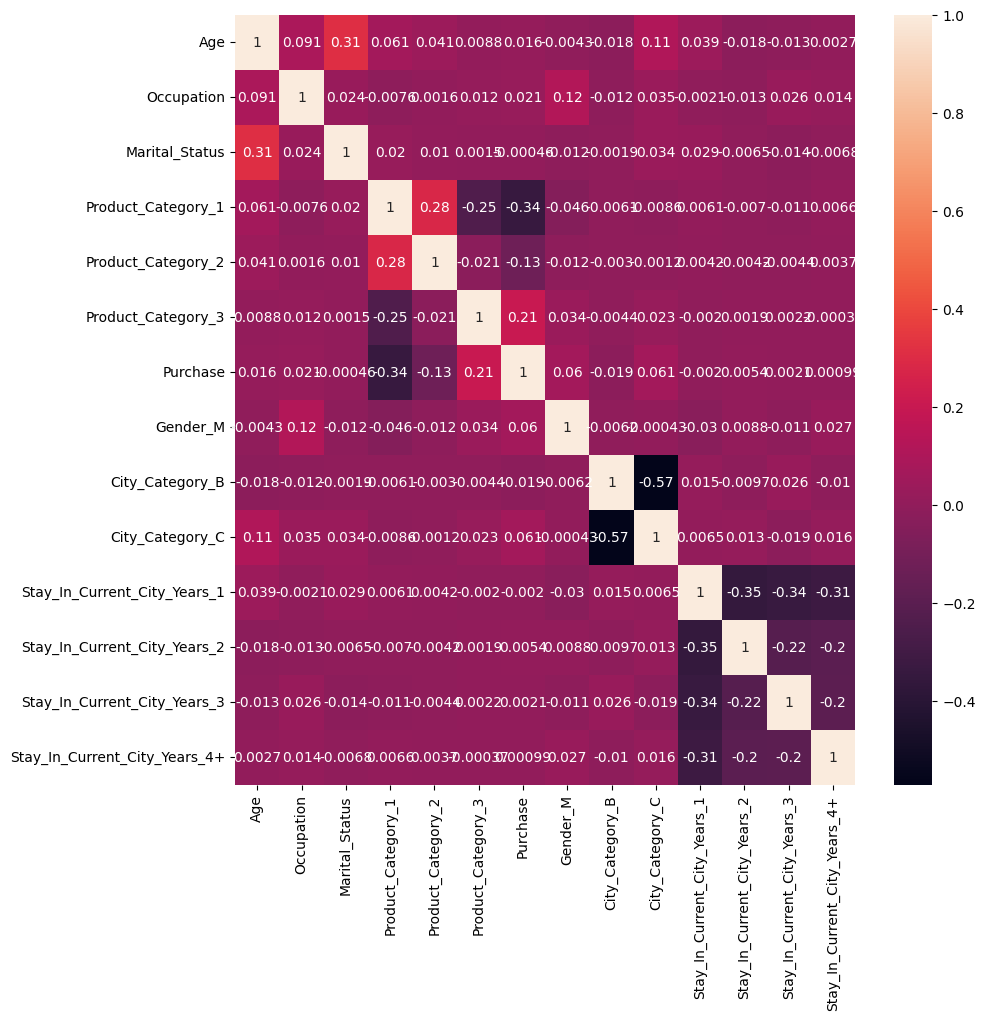

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# **Train Test Split**

In [32]:
X=df.drop(columns=['Purchase'])
y=df['Purchase']

In [33]:
# calling train_test_split() to get the training and testing data.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

# split sizes
print(X_train.shape)
print(X_test.shape)

(440054, 13)
(110014, 13)


In [34]:
y

0          8370
1         15200
2          1422
3          1057
4          7969
          ...  
550063      368
550064      371
550065      137
550066      365
550067      490
Name: Purchase, Length: 550068, dtype: int64

# **Linear Regression**

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 21682170.447840426
Mean Absolute Error: 3571.152403868421
R^2 Score: 0.14136998695002667


# **Decision Tree**

In [36]:
# importing decisiontree
from sklearn.tree import DecisionTreeRegressor

In [37]:
# creating object anf fitting the model
dtc=DecisionTreeRegressor()
dtc.fit(X_train,y_train)

DecisionTreeRegressor()

In [38]:

# class predicting y
y_pred_dtc=dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [39]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_dtc)
mae = mean_absolute_error(y_test, y_pred_dtc)
r2 = r2_score(y_test, y_pred_dtc)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 10966020.78652627
Mean Absolute Error: 2343.5387559842256
R^2 Score: 0.5657374526368437


# **Random Forest**

In [40]:
#importing Random Forest regressor
from sklearn.ensemble import RandomForestRegressor

In [41]:
#fitting data into Random Forest regressor
rfc=RandomForestRegressor(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [42]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [43]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_rfc)
mae = mean_absolute_error(y_test, y_pred_rfc)
r2 = r2_score(y_test, y_pred_rfc)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 9295702.928830216
Mean Absolute Error: 2217.437146127675
R^2 Score: 0.6318832772627181


# **Gradient Boosting**

In [44]:

#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
#fitting data into Gradient Boosting regressor
gbc = GradientBoostingRegressor(random_state=42)
gbc.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [46]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [47]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_gbc)
mae = mean_absolute_error(y_test, y_pred_gbc)
r2 = r2_score(y_test, y_pred_gbc)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 8927314.695581725
Mean Absolute Error: 2269.3887849584776
R^2 Score: 0.6464717242211319


# **XG Boosting**

In [48]:
#importing XG Boosting regressor
from xgboost import XGBRegressor

In [49]:
#fitting data into XG Boosting regressor
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)


In [51]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_xgb)
mae = mean_absolute_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 8294551.827500266
Mean Absolute Error: 2153.3931149446526
R^2 Score: 0.671529602581849


**XG Boosting gave the best R2 score of 67.15%**

# **HyperParameter Tuning**

In [52]:
# Hyperparameter Grid for XGBRegressor
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15, 20, 25],
              'min_child_weight' : [1, 3],
              'gamma': [0.3, 0.2, 0.1]}

In [53]:
from sklearn.model_selection import  RandomizedSearchCV
# Create an instance of the RandomForestRegressor
xgb = XGBRegressor()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5,
                       verbose=2, scoring='neg_mean_squared_error')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [200, 250]},
                   scoring='neg_mean_squared_error', verbose=2)

In [54]:
xgb_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
xgb_grid.best_params_

{'n_estimators': 250,
 'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.2}

In [56]:
xgb_optimal_model = xgb_grid.best_estimator_

In [57]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

In [58]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_xgb_grid)
mae = mean_absolute_error(y_test, y_pred_xgb_grid)
r2 = r2_score(y_test, y_pred_xgb_grid)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 8773135.32434504
Mean Absolute Error: 2165.970456954921
R^2 Score: 0.6525773415464573


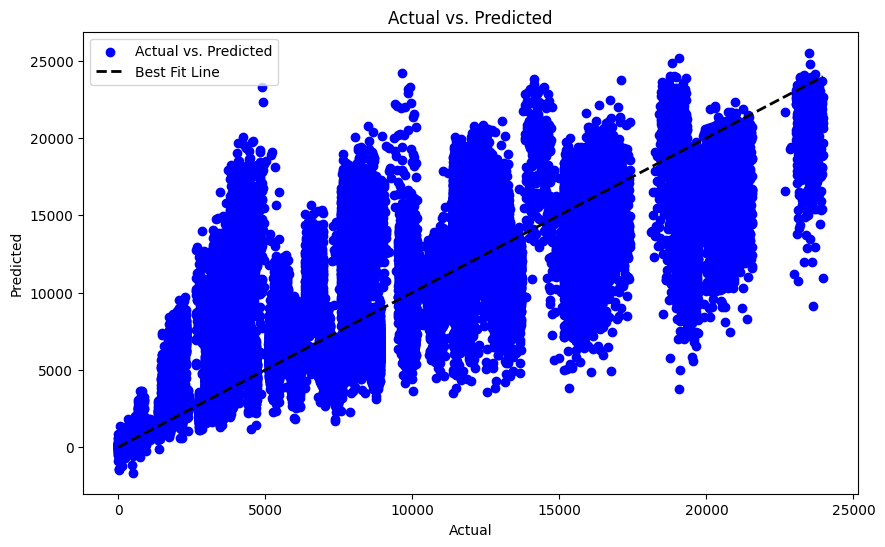

In [60]:
# Plotting the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb_grid, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Best Fit Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

# **Conclusion**
* All columns gave a very good VIF Except product_category_3 and age ~7
* **XG Boosting** gave the best R2 score of **67.15%.**
* After Hyperparameter tuning the score become low around **65.25%** because it did not let the model to overfit.
